# Model regresie liniara - Metoda celor mai mici patrate
## v2-happiness=f(gdp/capita, freedom)-by tool

In [1]:
import matplotlib.pyplot as plt
import numpy
import sklearn.linear_model
import sklearn.metrics
import utils

#### 1. Load data and verify liniarity

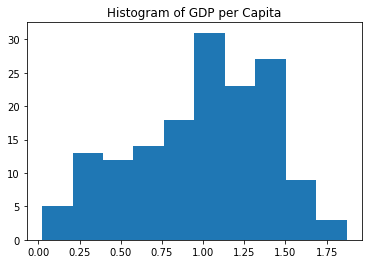

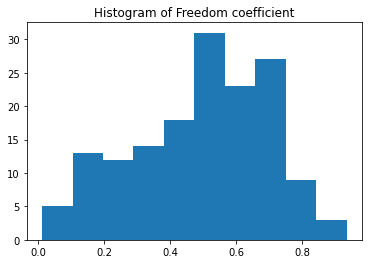

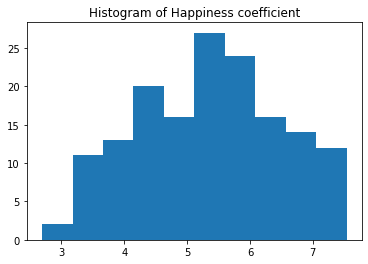

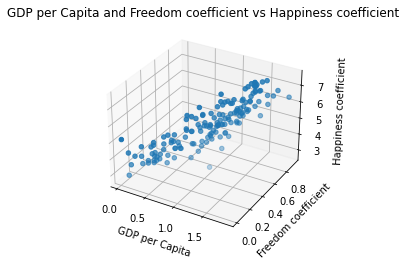

In [2]:
inputs, outputs = utils.get_data('data/v2_world-happiness-report-2017.csv')

utils.plot_data_histograms(inputs[0], 'GDP per Capita')
utils.plot_data_histograms(inputs[1], 'Freedom coefficient')
utils.plot_data_histograms(outputs, 'Happiness coefficient')

plt.figure()
ax = plt.axes(projection = '3d')

ax.scatter(inputs[0], inputs[1], outputs)
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Freedom coefficient')
ax.set_zlabel('Happiness coefficient')
ax.set_title("GDP per Capita and Freedom coefficient vs Happiness coefficient")
plt.show()

#### 2. Split data into training and validation subsets

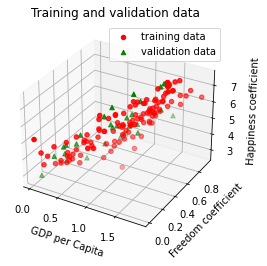

In [3]:
def split_data_into_training_and_validation(inputs, outputs, split_coeff):
    no_inputs = len(inputs[0])
    indexes = [i for i in range(no_inputs)]

    train_indexes = numpy.random.choice(indexes, int(split_coeff * no_inputs), replace=False)
    validation_indexes = [i for i in indexes if not i in train_indexes]

    train_inputs1 = [inputs[0][i] for i in train_indexes]
    train_inputs2 = [inputs[1][i] for i in train_indexes]
    train_inputs = [train_inputs1, train_inputs2]
    train_outputs = [outputs[i] for i in train_indexes]

    validation_inputs1 = [inputs[0][i] for i in validation_indexes]
    validation_inputs2 = [inputs[1][i] for i in validation_indexes]
    validation_inputs = [validation_inputs1, validation_inputs2]
    validation_outputs = [outputs[i] for i in validation_indexes]

    return train_inputs, train_outputs, validation_inputs, validation_outputs

train_inputs, train_outputs, validation_inputs, validation_outputs = split_data_into_training_and_validation(inputs, outputs, 0.8)

plt.figure()
ax = plt.axes(projection = '3d')
ax.scatter(train_inputs[0], train_inputs[1], train_outputs, c='r', marker='o', label='training data')
ax.scatter(validation_inputs[0], validation_inputs[1], validation_outputs, c='g', marker='^', label='validation data')
ax.set_title("Training and validation data")
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Freedom coefficient')
ax.set_zlabel('Happiness coefficient')
ax.legend()
plt.show()


#### 3. Init and train a linear regression model

In [4]:
X = [[el1, el2] for el1, el2 in zip(train_inputs[0], train_inputs[1])]
regressor = sklearn.linear_model.LinearRegression()
regressor.fit(X, train_outputs)
w0, w1, w2 = regressor.intercept_, regressor.coef_[0], regressor.coef_[1]
print('The learnt model:')
print('f(x1, x2) = ', w0, '+', w1, '* x1 +', w2, '* x2')

The learnt model:
f(x1, x2) =  3.169607339372769 + 41154917.91014692 * x1 + -82309831.45773812 * x2


#### 4. Use the learnt model to predict new inputs

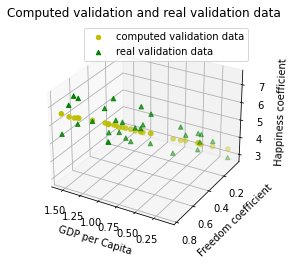

In [5]:
computed_validation_outputs = regressor.predict([[el1, el2] for el1, el2 in zip(validation_inputs[0], validation_inputs[1])])

plt.figure()
ax = plt.axes(projection = '3d')
ax.scatter(validation_inputs[0], validation_inputs[1], computed_validation_outputs, c='y', marker='o', label='computed validation data')
ax.scatter(validation_inputs[0], validation_inputs[1], validation_outputs, c='g', marker='^', label='real validation data')
ax.set_title("Computed validation and real validation data")
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Freedom coefficient')
ax.set_zlabel('Happiness coefficient')
ax.legend()
ax.view_init(28, 120)
plt.show()

#### 5. Performance evaluation - mean absolut error

In [6]:
mae = sklearn.metrics.mean_absolute_error(validation_outputs, computed_validation_outputs)
rmse = sklearn.metrics.mean_squared_error(validation_outputs, computed_validation_outputs)
print('Prediction error')
print('mean absolute error:', mae)
print('root mean squared error:', rmse)

Prediction error
mean absolute error: 0.6285021488358828
root mean squared error: 0.5376802497579848
